**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Graded Challenge 1 or Milestone 1

Wawan Setiawan Syamsul - HCK 6

## Description

### Objective

* Finding top 5 city who have most cases confirmed in US
* Compare Infection Fatality Rate (IFR) in top 5 city confirmed cases
* Show infection map pattern in city who have the most confirmed cases

### Problem Statement

Covid 19 become the worldwide pandemic caused by severe acute respiratory syndrome coronavirus 2 (SARS-Cov-2), in United States of America itself from January 2020 until May 2023 there have benn 103.436.829 confirmed cases with 1.127.152 deaths, which is the IFR is 1,089 %.

Based WHO dataview confirmed cases has it peak in 2020 and 2021, following that data given by WHO I will describe the data by using big-query to find top 5 city who have most cases confirmed cases, calculating and compare the IFR each top 5 city, then figure out infection map pattern in city who have the most ,confirmed cases in US

formula Infection Fatality Rate (IFR) = deaths/confirmed cases


## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

Import Pandas Library and Matplotlib

In [1]:
#langkah pertama adalah import pandas library 
import pandas as pd
import matplotlib.pyplot as plt


Data Loading

In [2]:
#setelah data telah di extract dari Google Cloud biq-query dan di simpan sesuai nama yang ditentukan, 
#langkah berikutnya adalah import file csv yang sudah di save di file ddirectory yang sama dengan menggunakan syntax panda berikut ini

df = pd.read_csv('h8dsft_P0GC1_Wawan-HCK6.csv')

C:\Users\Wawan'\AppData\Local\Temp\ipykernel_5988\3522991555.py:4: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('h8dsft_P0GC1_Wawan-HCK6.csv')


In [3]:
#pada langkah berikut adalah menampilkan data yang telah di import
df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Mississippi,US,2021-08-01,NaN,NaN,NaN,0,0.0,NaN,NaN,90028.0,Unassigned,"Unassigned, Mississippi, US"
1,Wyoming,US,2021-08-01,NaN,NaN,NaN,0,0.0,NaN,NaN,90056.0,Unassigned,"Unassigned, Wyoming, US"
2,Georgia,US,2022-01-15,NaN,NaN,NaN,9770,8.0,NaN,NaN,90013.0,Unassigned,"Unassigned, Georgia, US"
3,Connecticut,US,2022-04-24,NaN,NaN,NaN,2246,1.0,NaN,NaN,90009.0,Unassigned,"Unassigned, Connecticut, US"
4,Tennessee,US,2021-07-20,NaN,NaN,NaN,12841,95.0,NaN,NaN,90047.0,Unassigned,"Unassigned, Tennessee, US"


Datatype Checking

In [4]:
#langkah berikut adalah untuk mengecek type data yang tersedia
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513278 entries, 0 to 3513277
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   latitude        float64
 4   longitude       float64
 5   location_geom   object 
 6   confirmed       int64  
 7   deaths          float64
 8   recovered       float64
 9   active          float64
 10  fips            float64
 11  admin2          object 
 12  combined_key    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 348.5+ MB


Missing Value Checking

In [5]:
#dengan syntax berikut dapat diketahui bahwa dalam dataset terdapat beberapa value = null
df.isnull().sum()

province_state          0
country_region          0
date                    0
latitude            74357
longitude           74357
location_geom       74357
confirmed               0
deaths                 30
recovered         2403080
active            2404744
fips                13793
admin2               8703
combined_key         1560
dtype: int64

Data Manipulation 1 : Delete Unnecessary Column

In [6]:
#dari tahap ini akan dilakukan penghapusan column yang tidak diperlukan
#column ["fips","admin2","combined_key","latitude","longitude"] di hapus dikarenakan data yang akan dihitung adalah jumlah confirmed case beserta death,and recovered case untuk dibandingkan per 10 ten kota di US
df = df.drop(["fips","admin2","combined_key","location_geom"], axis = 1)
df.head()

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active
0,Mississippi,US,2021-08-01,NaN,NaN,0,0.0,NaN,NaN
1,Wyoming,US,2021-08-01,NaN,NaN,0,0.0,NaN,NaN
2,Georgia,US,2022-01-15,NaN,NaN,9770,8.0,NaN,NaN
3,Connecticut,US,2022-04-24,NaN,NaN,2246,1.0,NaN,NaN
4,Tennessee,US,2021-07-20,NaN,NaN,12841,95.0,NaN,NaN


Turn Null Value into Int(0)

In [7]:
#berdasarkan df.info sebelumnya diketahui beberapa data memiliki value = null
#dalam syntax ini value=null akan diisi dengan int(0)
df['deaths'] = df['deaths'].fillna(0)
df['recovered'] = df['recovered'].fillna(0)
df['active'] = df['active'].fillna(0)
df.head()

,province_state,country_region,date,latitude,longitude,confirmed,deaths,recovered,active
0,Mississippi,US,2021-08-01,NaN,NaN,0,0.0,0.0,0.0
1,Wyoming,US,2021-08-01,NaN,NaN,0,0.0,0.0,0.0
2,Georgia,US,2022-01-15,NaN,NaN,9770,8.0,0.0,0.0
3,Connecticut,US,2022-04-24,NaN,NaN,2246,1.0,0.0,0.0
4,Tennessee,US,2021-07-20,NaN,NaN,12841,95.0,0.0,0.0


In [8]:
#setelah syntax diatas dijalankan maka semua null value telah berubah menjadi int(0)#
#latitude & longitude dipertahankan untuk perhitungan selanjutnya yaitu mengakumulasi total daerah/kordinat paling banyak terdapat case
df.isnull().sum()

province_state        0
country_region        0
date                  0
latitude          74357
longitude         74357
confirmed             0
deaths                0
recovered             0
active                0
dtype: int64

Formatting Date and Set Index Column Date

In [9]:
#dari syntax berikut format date disesuaikan lalu disort ASC berdasarkan tanggal
#lalu untuk melanjutkan perhitungan, kolom "date" dijadikan index untuk memfilter case yang terjadi di tahun 2020, 2021, 2022
df['date'] = pd.to_datetime(df['date'],dayfirst=True)
df.sort_values(by='date',inplace=True)
df.set_index('date',inplace=True)

In [10]:
df.head()

,province_state,country_region,latitude,longitude,confirmed,deaths,recovered,active
date,,,,,,,,
2020-01-22,Washington,US,NaN,NaN,1,0.0,0.0,0.0
2020-01-23,Washington,US,NaN,NaN,1,0.0,0.0,0.0
2020-01-24,Washington,US,NaN,NaN,1,0.0,0.0,0.0
2020-01-24,Chicago,US,NaN,NaN,1,0.0,0.0,0.0
2020-01-25,Washington,US,NaN,NaN,1,0.0,0.0,0.0


Filter Dataframe only 2020 and 2021

In [11]:
#dari dataset yang sudah di manipulate, data tersebut dibagi 3 dataset yang mewakili tahun 2020, 2021, 2022 
pandemic_2020 = df.loc['2020/01/01':'2020/12/31']
pandemic_2021 = df.loc['2021/01/01':'2021/12/31']

Set Index Province State to get sum by Province State

In [12]:
#setelah data dibagi, disini "province_state" akan di set sebagai index untuk mengakumulasi case berdasarka kota di US
pandemic_2020.set_index('province_state',inplace=True)
pandemic_2021.set_index('province_state',inplace=True)

In [13]:
pandemic_2020 = pandemic_2020.drop(["latitude","longitude"],axis=1)
pandemic_2021 = pandemic_2021.drop(["latitude","longitude"],axis=1)

In [14]:
#new dataset pandemic_2020 dengan "province_state" sebagai index
pandemic_2020

,country_region,confirmed,deaths,recovered,active
province_state,,,,,
Washington,US,1,0.0,0.0,0.0
Washington,US,1,0.0,0.0,0.0
Washington,US,1,0.0,0.0,0.0
Chicago,US,1,0.0,0.0,0.0
Washington,US,1,0.0,0.0,0.0
...,...,...,...,...,...
Tennessee,US,4416,58.0,0.0,4358.0
Mississippi,US,4106,60.0,0.0,4046.0
Iowa,US,2264,44.0,0.0,2220.0


In [15]:
#new dataset pandemic_2021 dengan "province_state" sebagai index
pandemic_2021

,country_region,confirmed,deaths,recovered,active
province_state,,,,,
New York,US,1859,10.0,0.0,1849.0
North Dakota,US,1029,11.0,0.0,1018.0
Georgia,US,1369,26.0,0.0,1343.0
Florida,US,82890,1895.0,0.0,80995.0
South Dakota,US,412,7.0,0.0,405.0
...,...,...,...,...,...
Virginia,US,729,7.0,0.0,0.0
Florida,US,13359,89.0,0.0,0.0
Arkansas,US,11536,193.0,0.0,0.0


## Finding 5 Top City with most Confirmed Cases

In [16]:
#dataset dengan "province_state" sebagai index kemudian di group dan total berdasarkan kota di US
#dataset kemudian diurutkan DSC untuk mencari top 5 kota dengan case terbanyak
sum_pandemic_2020 = pandemic_2020.groupby("province_state").sum().sort_values('confirmed',ascending=False)
sum_pandemic_2021 = pandemic_2021.groupby("province_state").sum().sort_values('confirmed',ascending=False)

C:\Users\Wawan'\AppData\Local\Temp\ipykernel_5988\3508614139.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_pandemic_2020 = pandemic_2020.groupby("province_state").sum().sort_values('confirmed',ascending=False)
C:\Users\Wawan'\AppData\Local\Temp\ipykernel_5988\3508614139.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_pandemic_2021 = pandemic_2021.groupby("province_state").sum().sort_values('confirmed',ascending=False)


In [17]:
#dataset diubah hanya untuk menampilkan 5 kota dengan case terbanyak
sum_pandemic_2020 = sum_pandemic_2020.head(5)
sum_pandemic_2021 = sum_pandemic_2021.head(5)

In [18]:
#new dataset sum_pandemic_2020 dengan 5 case terbanyak di US
sum_pandemic_2020

,confirmed,deaths,recovered,active
province_state,,,,
California,174197882,3060207.0,40.0,170911859.0
Texas,157633806,2905863.0,0.0,154613618.0
Florida,138120349,2632332.0,0.0,135413926.0
New York,125081176,8375884.0,0.0,114849239.0
Illinois,81860582,2201234.0,16.0,79493738.0


In [19]:
#new dataset sum_pandemic_2021 dengan 5 case terbanyak di US
sum_pandemic_2021

,confirmed,deaths,recovered,active
province_state,,,,
California,1488988179,22516946.0,0.0,206173428.0
Texas,1197089236,20008981.0,0.0,152196452.0
Florida,979824693,15316113.0,0.0,108817123.0
New York,776279949,19095272.0,0.0,87995526.0
Illinois,526444787,9252855.0,0.0,71044972.0


Results and Visual of top 5 city in 2020 and 2021

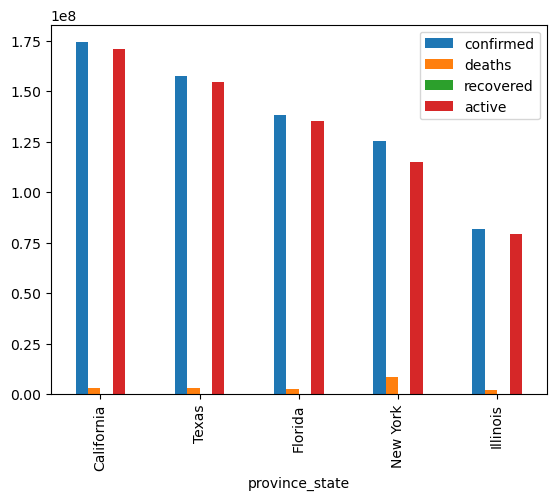

In [20]:
#berikut syntax yang menunjukan pandemic_2020 dengan perbandingan confirmed,death,recovered,active case dari 5 kota teratas
visual1 = sum_pandemic_2020.plot.bar()

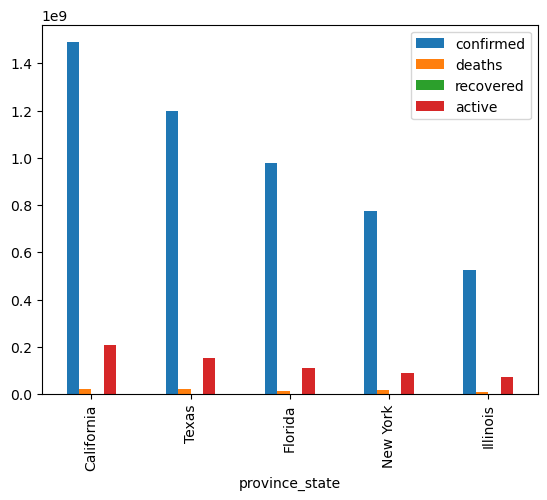

In [21]:
#berikut syntax yang menunjukan pandemic_2021 dengan perbandingan confirmed,death,recovered,active case dari 5 kota teratas
visual2= sum_pandemic_2021.plot.bar()

## Finding IFR rate and Recover Rate

In [22]:
#dari dataset pandemic_2020, perhitungan selanjuatnya berniat untuk mendapatkan IFR (Infection Fatality Rate) dan Recover rate
#Infection Fatality Rate ; IFR = Death/Case
#Recover rate = 100-IFR
sum_pandemic_2020["IFR"] = (sum_pandemic_2020["deaths"] / sum_pandemic_2020["confirmed"])*100
sum_pandemic_2020["recover rate"] = 100 - ((sum_pandemic_2020["deaths"] / sum_pandemic_2020["confirmed"])*100)
sum_pandemic_2020["IFR"] = ["{:.2f}".format(i) for i in sum_pandemic_2020["IFR"] ]
sum_pandemic_2020["recover rate"] = ["{:.2f}".format(i) for i in sum_pandemic_2020["recover rate"] ]
sum_pandemic_2020["IFR"] = pd.to_numeric(sum_pandemic_2020["IFR"])
sum_pandemic_2020["recover rate"] = pd.to_numeric(sum_pandemic_2020["recover rate"])



In [23]:
#new dataset pandemic_2020 dengan kolom baru IFR dan recover
sum_pandemic_2020

,confirmed,deaths,recovered,active,IFR,recover rate
province_state,,,,,,
California,174197882,3060207.0,40.0,170911859.0,1.76,98.24
Texas,157633806,2905863.0,0.0,154613618.0,1.84,98.16
Florida,138120349,2632332.0,0.0,135413926.0,1.91,98.09
New York,125081176,8375884.0,0.0,114849239.0,6.70,93.30
Illinois,81860582,2201234.0,16.0,79493738.0,2.69,97.31


Visual Comparison IFR and Recover Rate top 5 City 

array([<Axes: ylabel='IFR'>, <Axes: ylabel='recover rate'>], dtype=object)

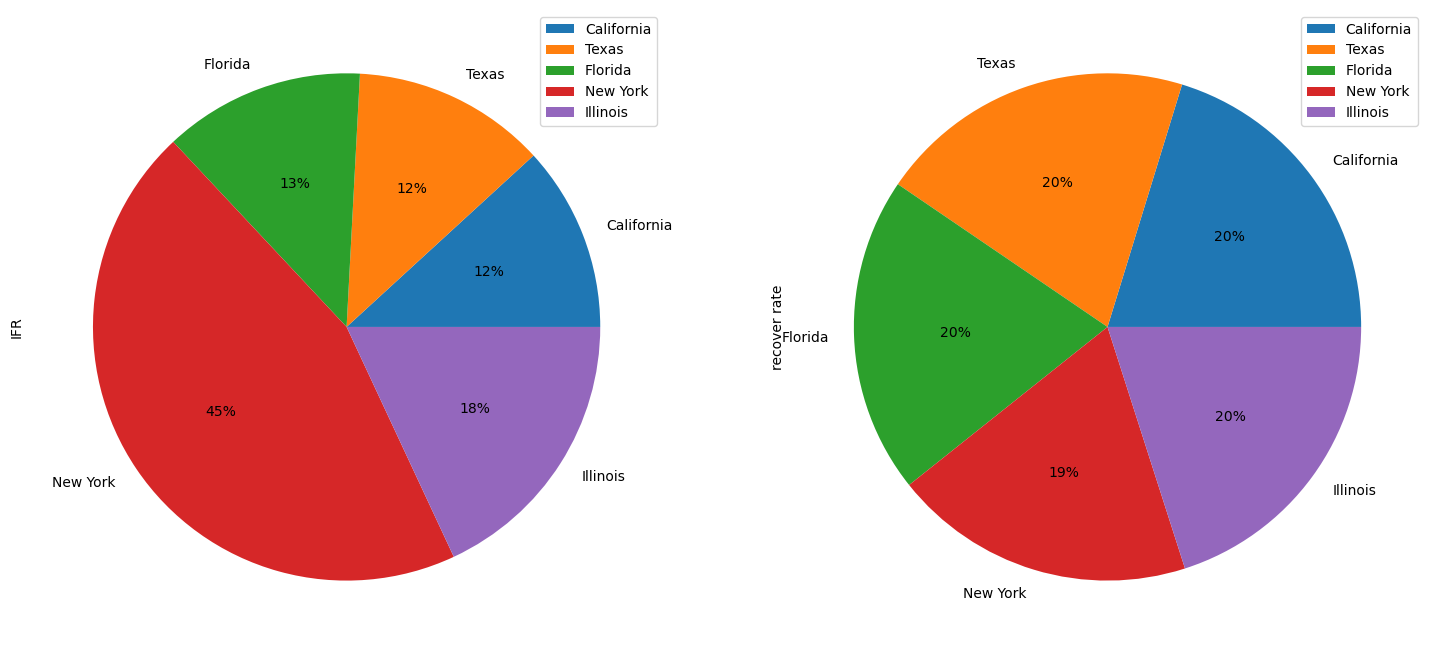

In [24]:
#minimalkan data set untuk mendapatkan pie chart IFR dan Recover Rate 2020
new_set_2020 = sum_pandemic_2020.drop(["confirmed","deaths","recovered","active"], axis = 1)
new_set_2020.plot(kind='pie',autopct='%.0f%%',legend=True,figsize=(18,23),subplots=True)



In [25]:
#dari dataset pandemic_2021, perhitungan selanjuatnya berniat untuk mendapatkan IFR (Infection Fatality Rate) dan Recover rate
#Infection Fatality Rate ; IFR = Death/Case
#Recover rate = 100-IFR
sum_pandemic_2021["IFR"] = (sum_pandemic_2021["deaths"] / sum_pandemic_2021["confirmed"])*100
sum_pandemic_2021["recover rate"] = 100 - ((sum_pandemic_2021["deaths"] / sum_pandemic_2021["confirmed"])*100)
sum_pandemic_2021["IFR"] = ["{:.2f}".format(i) for i in sum_pandemic_2021["IFR"] ]
sum_pandemic_2021["recover rate"] = ["{:.2f}".format(i) for i in sum_pandemic_2021["recover rate"] ]
sum_pandemic_2021["IFR"] = pd.to_numeric(sum_pandemic_2021["IFR"])
sum_pandemic_2021["recover rate"] = pd.to_numeric(sum_pandemic_2021["recover rate"])

In [26]:
sum_pandemic_2021

,confirmed,deaths,recovered,active,IFR,recover rate
province_state,,,,,,
California,1488988179,22516946.0,0.0,206173428.0,1.51,98.49
Texas,1197089236,20008981.0,0.0,152196452.0,1.67,98.33
Florida,979824693,15316113.0,0.0,108817123.0,1.56,98.44
New York,776279949,19095272.0,0.0,87995526.0,2.46,97.54
Illinois,526444787,9252855.0,0.0,71044972.0,1.76,98.24


array([<Axes: ylabel='IFR'>, <Axes: ylabel='recover rate'>], dtype=object)

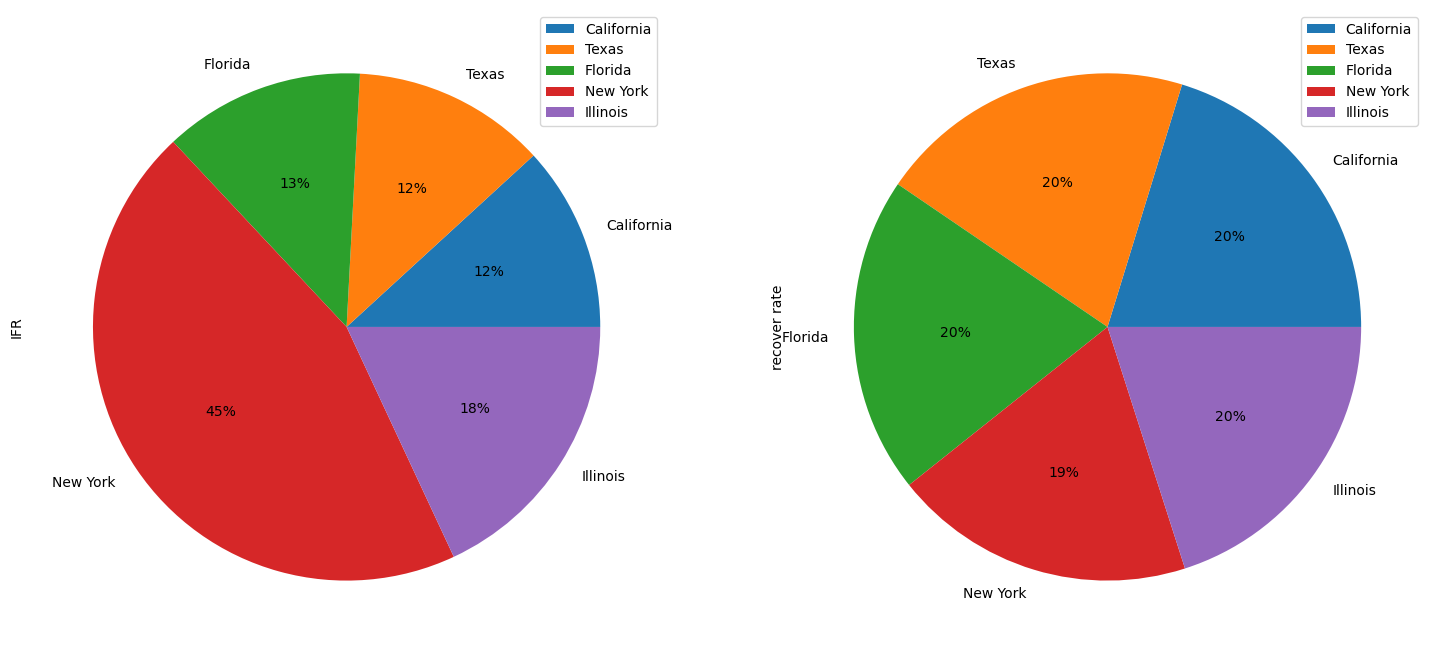

In [27]:
#minimalkan data set untuk mendapatkan pie chart IFR dan Recover Rate 2020
new_set_2021 = sum_pandemic_2020.drop(["confirmed","deaths","recovered","active"], axis = 1)
new_set_2021.plot(kind='pie',autopct='%.0f%%',legend=True,figsize=(18,23),subplots=True)

## Find Infection Pattern in California

In [28]:
# check ulang dataset master
df.head()

,province_state,country_region,latitude,longitude,confirmed,deaths,recovered,active
date,,,,,,,,
2020-01-22,Washington,US,NaN,NaN,1,0.0,0.0,0.0
2020-01-23,Washington,US,NaN,NaN,1,0.0,0.0,0.0
2020-01-24,Washington,US,NaN,NaN,1,0.0,0.0,0.0
2020-01-24,Chicago,US,NaN,NaN,1,0.0,0.0,0.0
2020-01-25,Washington,US,NaN,NaN,1,0.0,0.0,0.0


In [29]:
#check ulang missing value dataset master
df.isnull().sum()

province_state        0
country_region        0
latitude          74357
longitude         74357
confirmed             0
deaths                0
recovered             0
active                0
dtype: int64

In [30]:
# set period dataset untuk 2020 dan 2021
new_df_pandemic_2020 = df.loc['2020/01/01':'2020/12/31']
new_df_pandemic_2021 = df.loc['2021/01/01':'2021/12/31']

In [31]:
#menghilangkan value latitude dan longitude = null
new_df_pandemic_2020 = new_df_pandemic_2020.dropna(axis=0)
new_df_pandemic_2021 = new_df_pandemic_2021.dropna(axis=0)

In [32]:
#menghilangkan column yang tidak diperlukan
new_df_pandemic_2020 = new_df_pandemic_2020.drop(['confirmed','deaths','recovered','active'],axis=1)
new_df_pandemic_2021 = new_df_pandemic_2021.drop(['confirmed','deaths','recovered','active'],axis=1)

In [33]:
new_df_pandemic_2020.set_index('province_state',inplace=True)
new_df_pandemic_2021.set_index('province_state',inplace=True)

In [34]:
#mem filter dataset hanya untuk California
new_df_pandemic_2020 = new_df_pandemic_2020.filter(like='California', axis=0)
new_df_pandemic_2021 = new_df_pandemic_2021.filter(like='California', axis=0)

In [35]:
#set sumbu x dan y untuk visual scatter plot
y2020 = new_df_pandemic_2020['latitude']
x2020 = new_df_pandemic_2020['longitude']
y2021 = new_df_pandemic_2021['latitude']
x2021 = new_df_pandemic_2021['longitude']


Visual Scatter Plot for finding pattern infection map 2020 and 2021

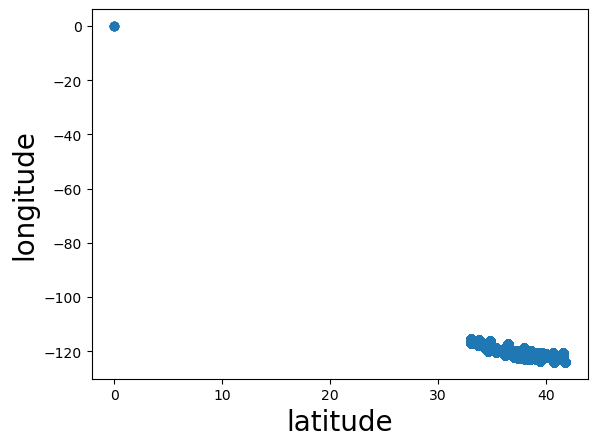

In [36]:
plt.scatter(y2020,x2020)
plt.xlabel('latitude',fontsize=20)
plt.ylabel('longitude',fontsize=20)
plt.show()

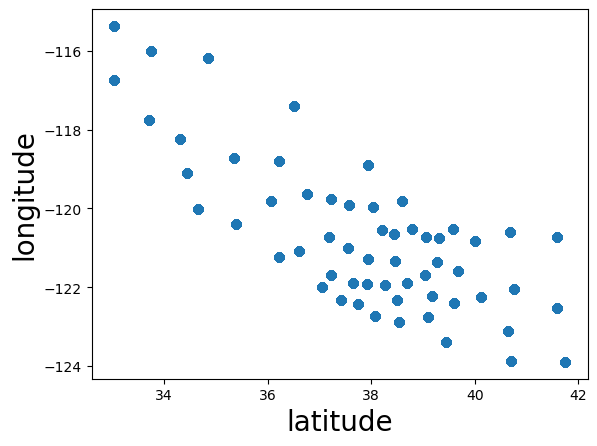

In [37]:
plt.scatter(y2021,x2021)
plt.xlabel('latitude',fontsize=20)
plt.ylabel('longitude',fontsize=20)
plt.show()

## Conclusions, Assumptions, Overall Analysis

From dataset above, the objective conclution is:

## Top 5 city in US with the most confirmed case

In [38]:
sum_pandemic_2020

,confirmed,deaths,recovered,active,IFR,recover rate
province_state,,,,,,
California,174197882,3060207.0,40.0,170911859.0,1.76,98.24
Texas,157633806,2905863.0,0.0,154613618.0,1.84,98.16
Florida,138120349,2632332.0,0.0,135413926.0,1.91,98.09
New York,125081176,8375884.0,0.0,114849239.0,6.70,93.30
Illinois,81860582,2201234.0,16.0,79493738.0,2.69,97.31


In [39]:
sum_pandemic_2021

,confirmed,deaths,recovered,active,IFR,recover rate
province_state,,,,,,
California,1488988179,22516946.0,0.0,206173428.0,1.51,98.49
Texas,1197089236,20008981.0,0.0,152196452.0,1.67,98.33
Florida,979824693,15316113.0,0.0,108817123.0,1.56,98.44
New York,776279949,19095272.0,0.0,87995526.0,2.46,97.54
Illinois,526444787,9252855.0,0.0,71044972.0,1.76,98.24


California has the most cases in US for 2020 and 2021, 2nd is Texas, 3r is Florida, 4th is New York and 5th is Illnois

## IFR and Recover Rate top 5 city

In [40]:
sum_pandemic_2020

,confirmed,deaths,recovered,active,IFR,recover rate
province_state,,,,,,
California,174197882,3060207.0,40.0,170911859.0,1.76,98.24
Texas,157633806,2905863.0,0.0,154613618.0,1.84,98.16
Florida,138120349,2632332.0,0.0,135413926.0,1.91,98.09
New York,125081176,8375884.0,0.0,114849239.0,6.70,93.30
Illinois,81860582,2201234.0,16.0,79493738.0,2.69,97.31


array([<Axes: ylabel='IFR'>, <Axes: ylabel='recover rate'>], dtype=object)

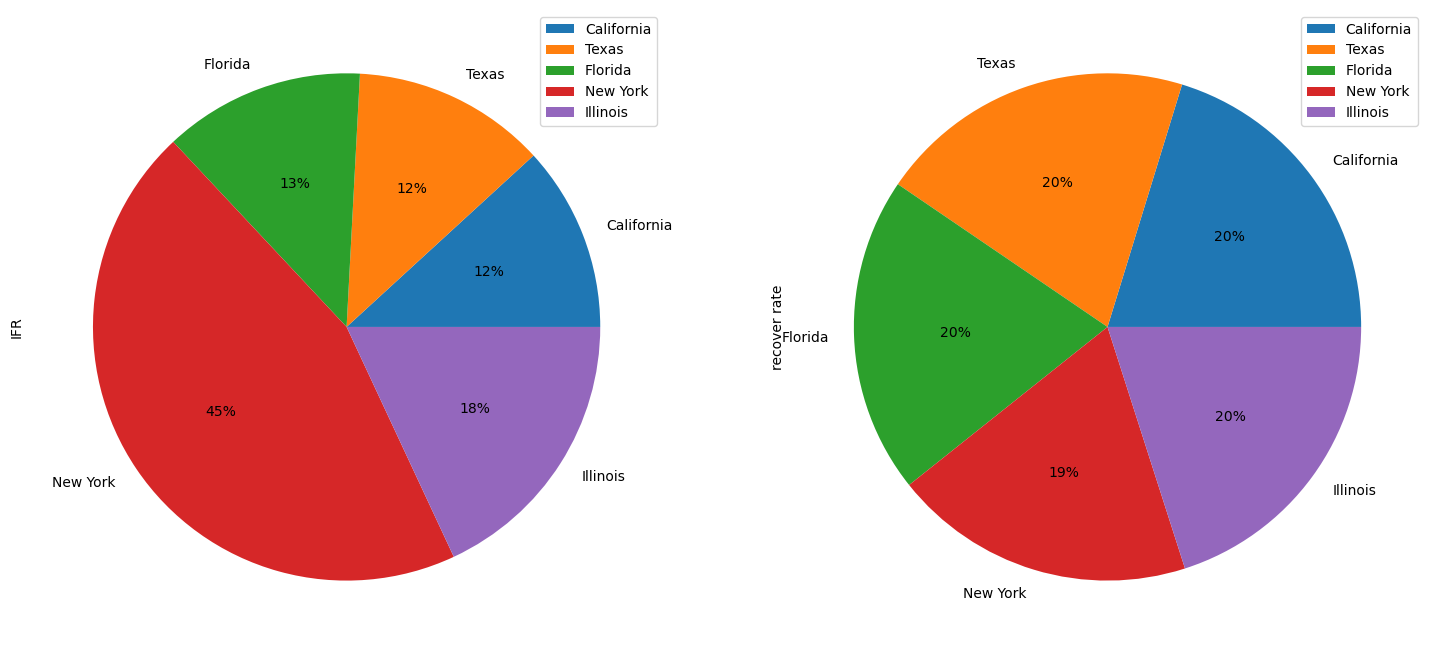

In [41]:
new_set_2020.plot(kind='pie',autopct='%.0f%%',legend=True,figsize=(18,23),subplots=True)

in 2020 California has the most confirmed cases but the lowest IFR compare to top 5 City and New York becoming the most IFR, this can be indicate how good local government treatment to pandemic or how much Hospital facility in that province

In [42]:
sum_pandemic_2021

,confirmed,deaths,recovered,active,IFR,recover rate
province_state,,,,,,
California,1488988179,22516946.0,0.0,206173428.0,1.51,98.49
Texas,1197089236,20008981.0,0.0,152196452.0,1.67,98.33
Florida,979824693,15316113.0,0.0,108817123.0,1.56,98.44
New York,776279949,19095272.0,0.0,87995526.0,2.46,97.54
Illinois,526444787,9252855.0,0.0,71044972.0,1.76,98.24


array([<Axes: ylabel='IFR'>, <Axes: ylabel='recover rate'>], dtype=object)

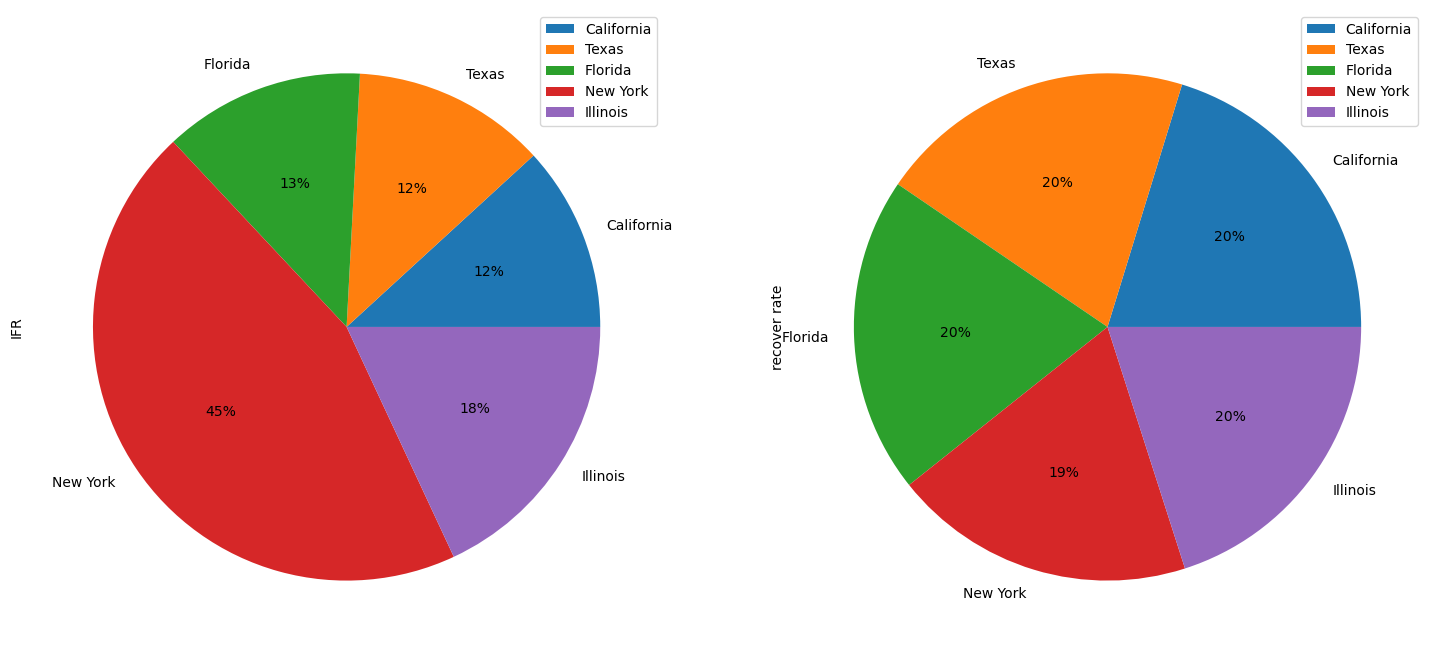

In [43]:
new_set_2021.plot(kind='pie',autopct='%.0f%%',legend=True,figsize=(18,23),subplots=True)

in 2021 New York still have the most IFR than other 5 city, this could indicate there is no improvement in 2021 for the treatment and Hospital service in that province

## Infection Map Pattern

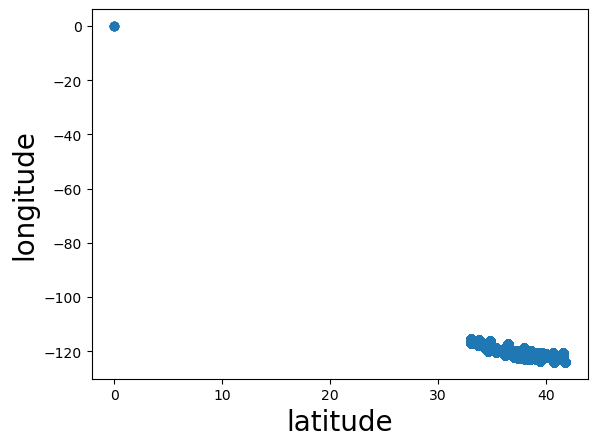

In [44]:
plt.scatter(y2020,x2020)
plt.xlabel('latitude',fontsize=20)
plt.ylabel('longitude',fontsize=20)
plt.show()

in 2020 we can see that confirmed case is focused on one area

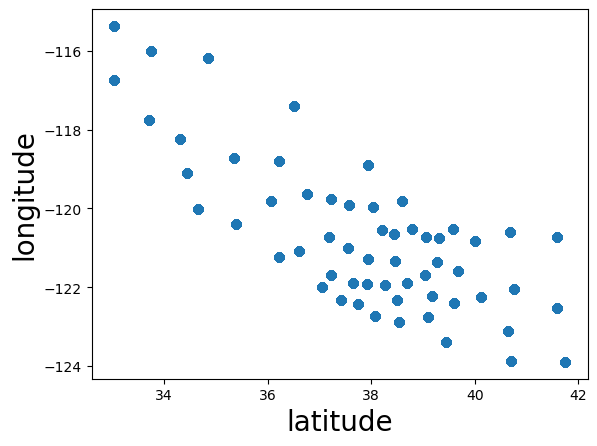

In [45]:
plt.scatter(y2021,x2021)
plt.xlabel('latitude',fontsize=20)
plt.ylabel('longitude',fontsize=20)
plt.show()

in 2021 we can see that infection is more widely confirmed in all area

## OVERALL ANALYSIS

in US for 2020 and 2021 there is no change for the most confirmed case, and while confirmed case is high is not always that death cases is also high due to government treatment and amount available Hospital service in that province, for covid-19 itself we can see that the infection is so rapid, for only 1 year all area has already infected by covid 19